# Выполнил: Харисов Ильнур Шаукатович

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from statsmodels.api import OLS, add_constant
from torch.nn.functional import threshold
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from linearmodels.panel import RandomEffects, PooledOLS, PanelOLS
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Задание №1

### (a)

### (b)

### (c)

In [68]:
np.random.seed(5445)
n = 50
b0 = 2
b1 = 0.1
b2 = -0.06
sigma = 4

In [69]:
epsilon = np.random.normal(0, sigma, n + 2)
y = np.array([
    b0 + epsilon[t] + b1 * epsilon[t - 1] + b2 * epsilon[t - 2]
    for t in range(2, n + 2)
])

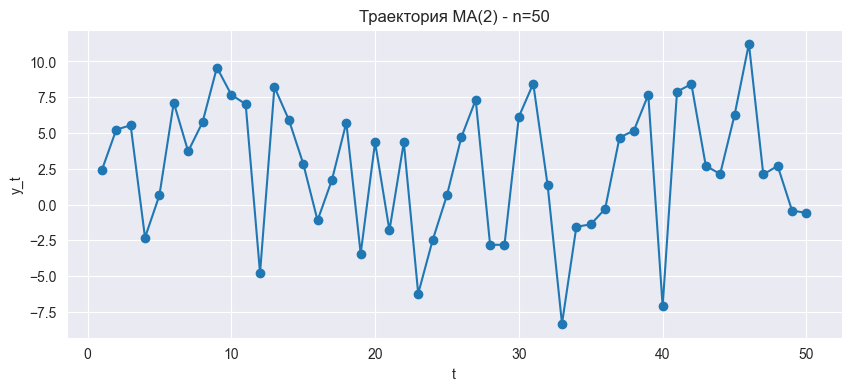

In [70]:
plt.figure(figsize=(10, 4))
plt.plot(range(1, n+1), y, marker='o')
plt.title('Траектория MA(2) - n=50')
plt.xlabel('t')
plt.ylabel('y_t')
plt.grid(True)
plt.show()

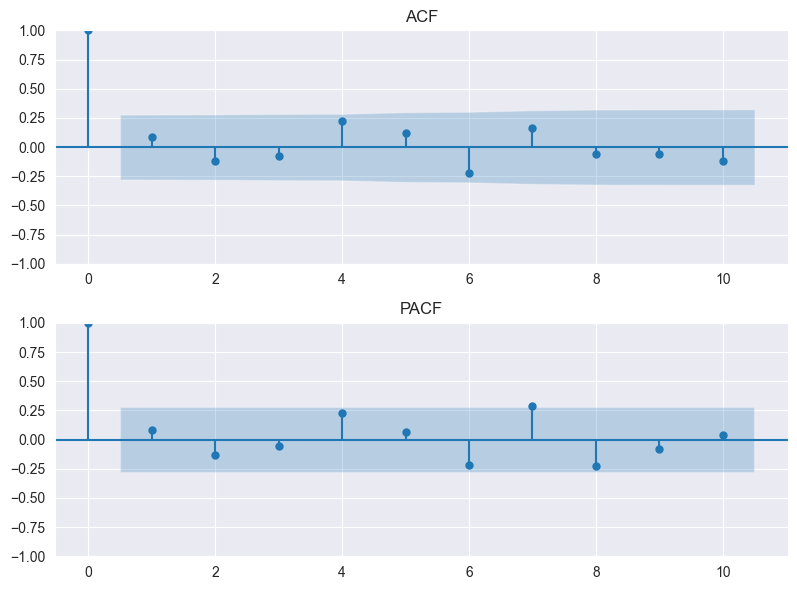

In [71]:
plt.figure(figsize=(8, 6))

ax1 = plt.subplot(2, 1, 1)
plot_acf(y, lags=10, ax=ax1)
ax1.set_title("ACF")
ax2 = plt.subplot(2, 1, 2)
plot_pacf(y, lags=10, ax=ax2)
ax2.set_title("PACF")

plt.grid(True)
plt.tight_layout()
plt.show()

Поведение ACF и PACF при небольшой выборке шумное и может ввести в заблуждение. Истинная MA(2) плохо распознаётся - второй пик при такой выборке оказывается незначим

### (d)

In [72]:
n = 500

epsilon = np.random.normal(0, sigma, n + 2)
y = np.array([
    b0 + epsilon[t] + b1 * epsilon[t - 1] + b2 * epsilon[t - 2]
    for t in range(2, n + 2)
])

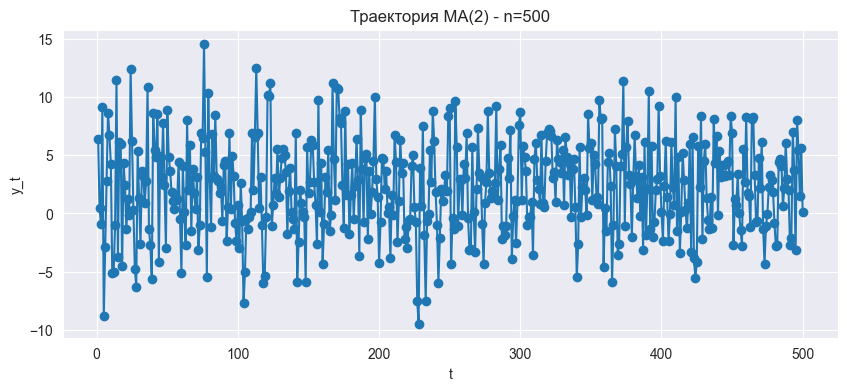

In [73]:
plt.figure(figsize=(10, 4))
plt.plot(range(1, n+1), y, marker='o')
plt.title('Траектория MA(2) - n=500')
plt.xlabel('t')
plt.ylabel('y_t')
plt.grid(True)
plt.show()

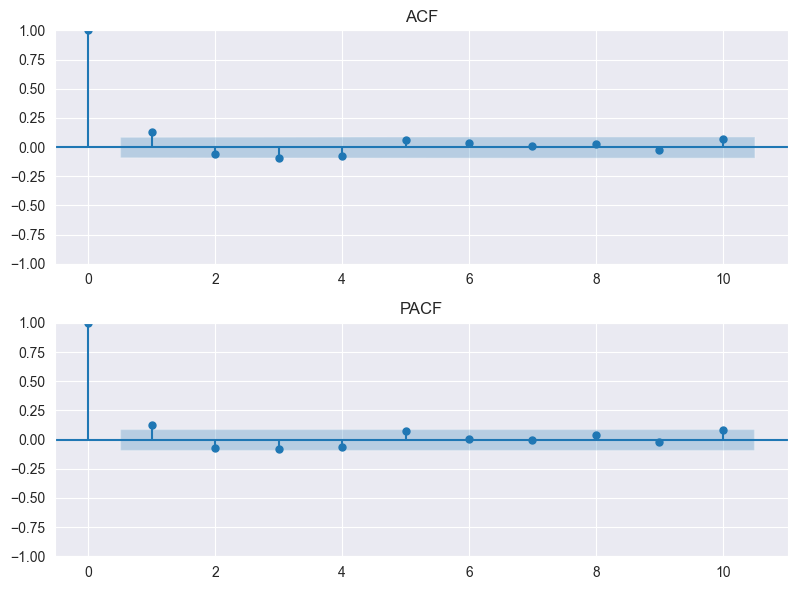

In [74]:
plt.figure(figsize=(8, 6))

ax1 = plt.subplot(2, 1, 1)
plot_acf(y, lags=10, ax=ax1)
ax1.set_title("ACF")
ax2 = plt.subplot(2, 1, 2)
plot_pacf(y, lags=10, ax=ax2)
ax2.set_title("PACF")

plt.grid(True)
plt.tight_layout()
plt.show()

Верно - при увеличении числа наблюдений выборочные значения ACF и PACF сходятся к истинным функциям автокорреляции и частной автокорреляции. Это объясняется тем, что ACF и PACF - состоятельные оценками и при большой выборке ошибки усредняются, приближая их к теоретическим значениям

## Задание №2

### (a)

### (b)

### (c)

In [75]:
np.random.seed(5445)
n = 50
mu = 2
sigma = 2
b0 = 1

In [76]:
epsilon = np.random.normal(0, sigma, n)
y = np.zeros(n)
y[0] = b0 + mu + epsilon[0]
for t in range(1, n):
    y[t] = mu + y[t-1] + epsilon[t]

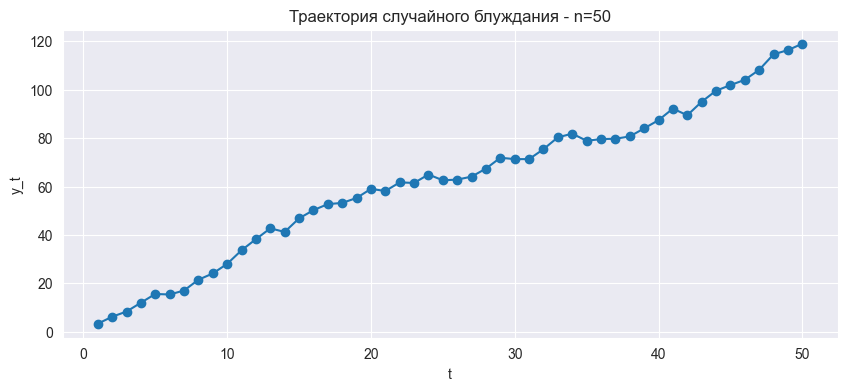

In [77]:
plt.figure(figsize=(10, 4))
plt.plot(range(1, n+1), y, marker='o')
plt.title('Траектория случайного блуждания - n=50')
plt.xlabel('t')
plt.ylabel('y_t')
plt.grid(True)
plt.show()

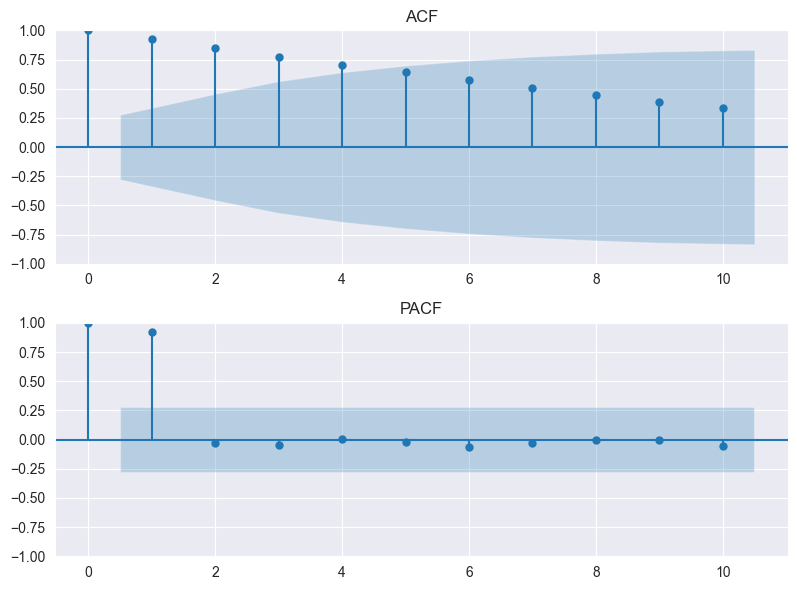

In [78]:
plt.figure(figsize=(8, 6))

ax1 = plt.subplot(2, 1, 1)
plot_acf(y, lags=10, ax=ax1)
ax1.set_title("ACF")
ax2 = plt.subplot(2, 1, 2)
plot_pacf(y, lags=10, ax=ax2)
ax2.set_title("PACF")

plt.grid(True)
plt.tight_layout()
plt.show()

Значения на ACF медленно убывают, но остаются положительными -> имеется сильная автокорреляция - это характерно для случайного блуждания AR(1).

Для PASF видим значимые пики на первых двух значениях - это можно объяснить нестационарностью процесса и эффектом накопления

а### (d)

In [43]:
n = 500

epsilon = np.random.normal(0, sigma, n)
y = np.zeros(n)
y[0] = y0 + mu + epsilon[0]
for t in range(1, n):
    y[t] = mu + y[t-1] + epsilon[t]

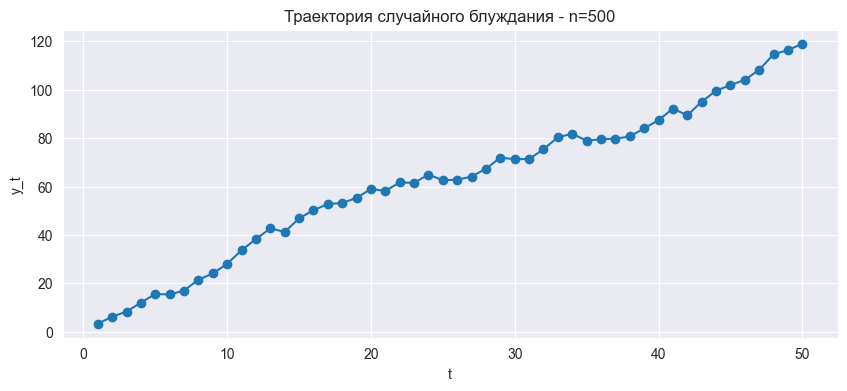

In [79]:
plt.figure(figsize=(10, 4))
plt.plot(range(1, n+1), y, marker='o')
plt.title('Траектория случайного блуждания - n=500')
plt.xlabel('t')
plt.ylabel('y_t')
plt.grid(True)
plt.show()

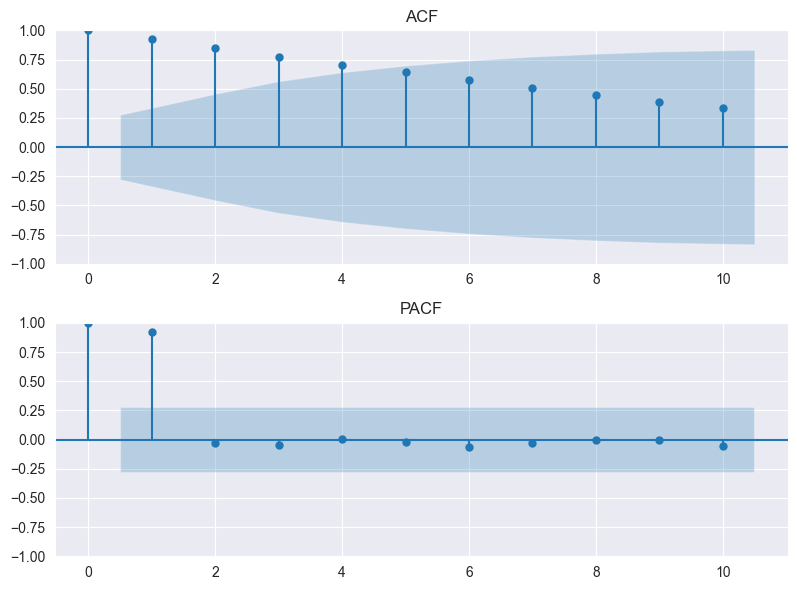

In [80]:
plt.figure(figsize=(8, 6))

ax1 = plt.subplot(2, 1, 1)
plot_acf(y, lags=10, ax=ax1)
ax1.set_title("ACF")
ax2 = plt.subplot(2, 1, 2)
plot_pacf(y, lags=10, ax=ax2)
ax2.set_title("PACF")

plt.grid(True)
plt.tight_layout()
plt.show()

Верно - при увеличении числа наблюдений выборочные значения ACF и PACF сходятся к истинным функциям автокорреляции и частной автокорреляции. Это объясняется тем, что ACF и PACF - состоятельные оценками и при большой выборке ошибки усредняются, приближая их к теоретическим значениям


## Задание №3

### (a)

### (b)

### (c)

### (d)

### (e)

### (f)

### (g)

### (h)

## Задание №4

### (a)

In [168]:
df = pd.read_excel("indicators_cpd.xlsx", header=1)
df = df.rename(columns={df.columns[0]: "Категория"})
row = df[df["Категория"].astype(str).str.strip() == "Продовольственные товары"]

numeric_values = pd.to_numeric(row.iloc[0, 1:], errors='coerce')
ts = numeric_values.dropna().astype(float)
print(f"Длина ряда: {len(ts)}")

ts.index = pd.date_range(start="2001-01-01", periods=len(ts), freq="MS")

model = ETSModel(ts, error="add", trend="add", seasonal="add", seasonal_periods=12)
fit = model.fit()

Длина ряда: 280
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18838D+00    |proj g|=  3.38757D-01

At iterate    1    f=  1.08760D+00    |proj g|=  1.61136D-01

At iterate    2    f=  1.06023D+00    |proj g|=  4.82280D-02

At iterate    3    f=  1.05663D+00    |proj g|=  2.56147D-01

At iterate    4    f=  1.05646D+00    |proj g|=  8.64073D-02

At iterate    5    f=  1.05557D+00    |proj g|=  7.85072D-02
  ys=-1.026E-04  -gs= 8.322E-04 BFGS update SKIPPED

At iterate    6    f=  1.05540D+00    |proj g|=  6.67900D-02

At iterate    7    f=  1.05509D+00    |proj g|=  4.53876D-02

At iterate    8    f=  1.05463D+00    |proj g|=  4.61998D-02

At iterate    9    f=  1.05291D+00    |proj g|=  4.69561D-02

At iterate   10    f=  1.04636D+00    |proj g|=  7.16023D-02

At iterate   11    f=  1.04415D+00    |proj g|=  9.85657D-02

At iterate   12    f

In [125]:
fitted = fit.fittedvalues
level = pd.to_numeric(fit.level, errors='coerce')
season = pd.to_numeric(fit.season, errors='coerce')
resid = pd.to_numeric(fit.resid, errors='coerce')

t = np.arange(len(ts))
model = OLS(ts.values, add_constant(t)).fit()
linear_trend = pd.Series(model.predict(X), index=ts.index)

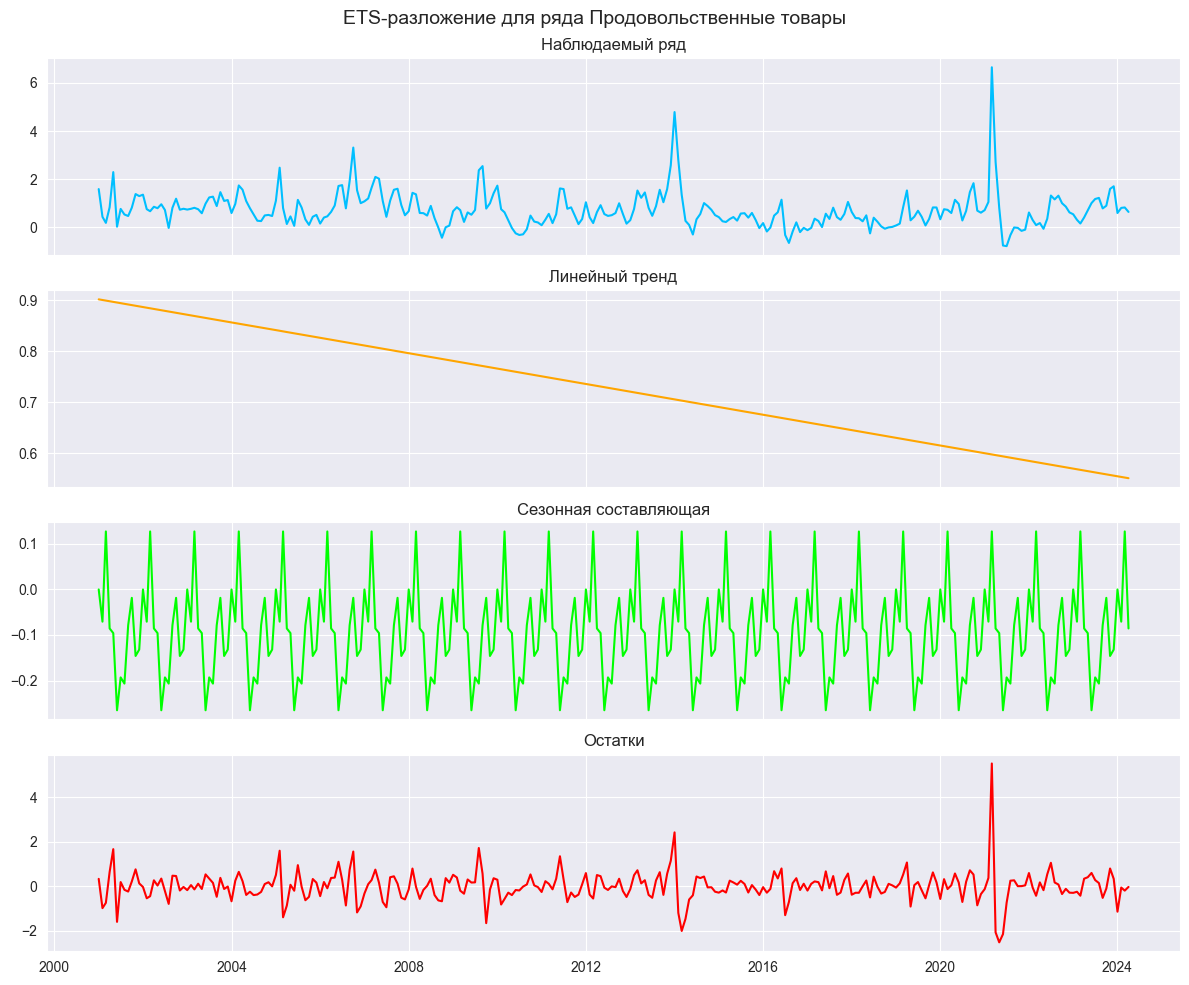

In [167]:
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

axs[0].plot(ts, color='deepskyblue')
axs[0].set_title("Наблюдаемый ряд")

axs[1].plot(linear_trend, color='orange')
axs[1].set_title("Линейный тренд")

axs[2].plot(season, color='lime')
axs[2].set_title("Сезонная составляющая")

axs[3].plot(resid, color='red')
axs[3].set_title("Остатки")

plt.suptitle("ETS-разложение для ряда Продовольственные товары", fontsize=14)
plt.tight_layout()
plt.show()

#### Интерпретация:

Сезонность отчётливо выражена: темпы инфляции минимальны летом и усиливаются к зиме, также видно скорее отсутствие тренда.
Модель хорошо объясняет поведение ряда: остатки имеют малую дисперсию, за исключением двух крупных пиков.

### (b)

In [160]:
threshold_ = int(len(ts) * 0.2)
train = ts.iloc[:-threshold_]
test = ts.iloc[-threshold_:]

print(f"Обучающая выборка: {train.index.min()} — {train.index.max()}")
print(f"Тестовая выборка:  {test.index.min()} — {test.index.max()}")

Обучающая выборка: 2001-01-01 00:00:00 — 2019-08-01 00:00:00
Тестовая выборка:  2019-09-01 00:00:00 — 2024-04-01 00:00:00


### (c)

In [161]:
# ETS(AAA) для исходного ряда
ets_model = ETSModel(train, error="add", trend="add", seasonal="add", seasonal_periods=12)
ets_fit = ets_model.fit()

# ETS(AAA) для логарифма
offset = abs(train.min()) + 1e-6
log_train = np.log(train + offset)
ets_log_model = ETSModel(log_train, error="add", trend="add", seasonal="add", seasonal_periods=12)
ets_log_fit = ets_log_model.fit()
ets_log_forecast = np.exp(ets_log_fit.forecast(len(test))) - offset

# наивная сезонная модель (предсказание 12 мес назад)
season_length = 12
last_season = train.iloc[-season_length:]
n_repeats = int(np.ceil(threshold_ / season_length))
forecast_raw = pd.concat([last_season] * n_repeats, ignore_index=True)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06761D+00    |proj g|=  5.61715D-01

At iterate    1    f=  8.99416D-01    |proj g|=  9.86777D-02

At iterate    2    f=  8.85595D-01    |proj g|=  1.14296D-01

At iterate    3    f=  8.82309D-01    |proj g|=  6.62822D-02

At iterate    4    f=  8.78904D-01    |proj g|=  6.86973D-02

At iterate    5    f=  8.74644D-01    |proj g|=  7.72155D-02

At iterate    6    f=  8.69109D-01    |proj g|=  1.29873D-01

At iterate    7    f=  8.68024D-01    |proj g|=  6.83345D-02

At iterate    8    f=  8.63345D-01    |proj g|=  1.00135D-01

At iterate    9    f=  8.58806D-01    |proj g|=  7.83357D-02

At iterate   10    f=  8.56267D-01    |proj g|=  3.67475D-02

At iterate   11    f=  8.53898D-01    |proj g|=  3.76048D-02

At iterate   12    f=  8.52098D-01    |proj g|=  5.05814D-02

At iterate   13    f=  8.5

Уравнения моделей:

1. ETS(AAA):
$$y_t = \ell_{t-1} + b_{t-1} + s_{t-12} + \varepsilon_t$$  <br>
2. ETS(log) - со сдвигом константой:
$$\log(y_t + c) = \ell_{t-1} + b_{t-1} + s_{t-12} + \varepsilon_t$$  <br>
3. Naive:
$$\hat{y}_t = y_{t - 12}$$


### (d)

In [162]:
def mase(y_true, y_pred, y_train, m=12):
    naive_forecast = y_train.shift(m)
    mae_naive = np.mean(np.abs(y_train[m:] - naive_forecast[m:]))
    mae_model = np.mean(np.abs(y_true - y_pred))
    return mae_model / mae_naive

In [163]:
ets_forecast = ets_fit.forecast(len(test))
ets_log_forecast = np.exp(ets_log_fit.forecast(len(test))) - offset
seasonal_naive_forecast = forecast_raw.iloc[:threshold_]
seasonal_naive_forecast.index = test.index

print("ETS(AAA):")
print("RMSE:", root_mean_squared_error(test, ets_forecast))
print("MAE: ", mean_absolute_error(test, ets_forecast))
print("MAPE:", mean_absolute_percentage_error(test, ets_forecast))
print("MASE:", mase(test, ets_forecast, train))

print("\nETS(log):")
print("RMSE:", root_mean_squared_error(test, ets_log_forecast))
print("MAE: ", mean_absolute_error(test, ets_log_forecast))
print("MAPE:", mean_absolute_percentage_error(test, ets_log_forecast))
print("MASE:", mase(test, ets_log_forecast, train))

print("\nSeasonal Naive:")
print("RMSE:", root_mean_squared_error(test, seasonal_naive_forecast))
print("MAE: ", mean_absolute_error(test, seasonal_naive_forecast))
print("MAPE:", mean_absolute_percentage_error(test, seasonal_naive_forecast))
print("MASE:", mase(test, seasonal_naive_forecast, train))

ETS(AAA):
RMSE: 1.0332804016333625
MAE:  0.5933083239789617
MAPE: 3.8387360099220715
MASE: 0.8304686075145966

ETS(log):
RMSE: 1.087290706044716
MAE:  0.6505747342552114
MAPE: 2.857056557435272
MASE: 0.910625844616099

Seasonal Naive:
RMSE: 1.122423441130706
MAE:  0.7773733262913901
MAPE: 1.49100287915407
MASE: 1.0881090281603614


По всем метрикам кроме MAPE побеждает обычная ETS(AAA) модель, по метрике MAPE выигрывает наивная

### (e)

In [164]:
ensemble_forecast = (ets_forecast + ets_log_forecast) / 2

print("Ensemble Forecast:")
print("RMSE:", root_mean_squared_error(test, ensemble_forecast))
print("MAE :", mean_absolute_error(test, ensemble_forecast))
print("MAPE:", mean_absolute_percentage_error(test, ensemble_forecast) * 100)
print("MASE:", mase(test, ensemble_forecast, train))

Ensemble Forecast:
RMSE: 1.05575138384254
MAE : 0.618968697569657
MAPE: 334.2419891977742
MASE: 0.8663860788577505


Усредняющая модель дала усредненные скоры, однако MAPE вырос т.к усреднение могло не уловить локальные пики (которые точнее в ETS(AAA) и ETS(log))

## Задание №5

### (a)

In [23]:
df = pd.read_excel('data_hw_03.xlsx')
df.head()

,nr,year,agric,black,bus,construc,ent,exper,fin,hisp,...,union,lwage,d81,d82,d83,d84,d85,d86,d87,expersq
0,13,1980,0,0,1,0,0,1,0,0,...,0,1.197540,0,0,0,0,0,0,0,1
1,13,1981,0,0,0,0,0,2,0,0,...,1,1.853060,1,0,0,0,0,0,0,4
2,13,1982,0,0,1,0,0,3,0,0,...,0,1.344462,0,1,0,0,0,0,0,9
3,13,1983,0,0,1,0,0,4,0,0,...,0,1.433213,0,0,1,0,0,0,0,16
4,13,1984,0,0,0,0,0,5,0,0,...,0,1.568125,0,0,0,1,0,0,0,25


In [24]:
df_panel = df.set_index(['nr', 'year'])

X = ['educ', 'black', 'hisp', 'exper', 'expersq', 'married', 'union']
y = df_panel['lwage']

pooled = PooledOLS(y, add_constant(df_panel[X])).fit()
print(f"{pooled.summary.as_text()}")

                          PooledOLS Estimation Summary                          
Dep. Variable:                  lwage   R-squared:                        0.1917
Estimator:                  PooledOLS   R-squared (Between):              0.2149
No. Observations:                3976   R-squared (Within):               0.1639
Date:                Wed, Jun 11 2025   R-squared (Overall):              0.1917
Time:                        18:05:02   Log-likelihood                   -2749.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      134.47
Entities:                         497   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                  F(7,3968)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             134.47
                            

Стандартные ошибки не являются надежными на панельных данных, тк в МНК предполагается независимость ошибок, однако в панели у каждого объекта могут быть скоррелированные ошибки

- оценки коэффициентов будут несмещенными при соблюдении экзогенности
- стандартные ошибки будут занижены

### (b)

In [25]:
re_model = RandomEffects(y, add_constant(df_panel[X])).fit()
print(f"{re_model.summary.as_text()}")

                        RandomEffects Estimation Summary                        
Dep. Variable:                  lwage   R-squared:                        0.1774
Estimator:              RandomEffects   R-squared (Between):              0.1936
No. Observations:                3976   R-squared (Within):               0.1750
Date:                Wed, Jun 11 2025   R-squared (Overall):              0.1851
Time:                        18:05:02   Log-likelihood                   -1495.7
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      122.25
Entities:                         497   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                  F(7,3968)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             122.25
                            

У модели со случайными эффектами получается меньший R2, однако больше признаков стали значимыми (при 5%)

### (c)

In [26]:
fe_model = PanelOLS(y, add_constant(df_panel[X]), entity_effects=True, drop_absorbed=True).fit()
print(f"{fe_model.summary.as_text()}")

                          PanelOLS Estimation Summary                           
Dep. Variable:                  lwage   R-squared:                        0.1757
Estimator:                   PanelOLS   R-squared (Between):             -0.0446
No. Observations:                3976   R-squared (Within):               0.1757
Date:                Wed, Jun 11 2025   R-squared (Overall):              0.0554
Time:                        18:05:04   Log-likelihood                   -1219.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      185.12
Entities:                         497   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                  F(4,3475)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             185.12
                            

/var/folders/84/r71blcnd0ydfkn2236j_0jk00000gn/T/ipykernel_21304/1025256557.py:1: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

educ, black, hisp

  fe_model = PanelOLS(y, add_constant(df_panel[X]), entity_effects=True, drop_absorbed=True).fit()


Определить эффект от стажа отдельно от эффекта времени и индивидуальных постоянных невозможно, потому что он почти идеально коллинеарен с временным трендом (как и например возраст человека)

Коэффициенты при `married_it` и `union_it` в модели с фиксированными эффектами становятся менее значимыми и меньшими по модулю, поскольку фиксированные эффекты учитывают корреляцию этих переменных с индивидуальными неизменными характеристиками

### (d)

In [27]:
for d in ['d81','d82','d83','d84','d85','d86','d87']:
    df_panel[f'{d}_educ'] = df_panel[d] * df_panel['educ']

X = ['educ', 'black', 'hisp', 'exper', 'expersq', 'married', 'union'] + [f'{d}_educ' for d in ['d81','d82','d83','d84','d85','d86','d87']]
y = df_panel['lwage']

fe_model = PanelOLS(y, add_constant(df_panel[X]), entity_effects=True, drop_absorbed=True).fit()
print(f"{fe_model.summary.as_text()}")

                          PanelOLS Estimation Summary                           
Dep. Variable:                  lwage   R-squared:                        0.1785
Estimator:                   PanelOLS   R-squared (Between):             -0.1964
No. Observations:                3976   R-squared (Within):               0.1785
Date:                Wed, Jun 11 2025   R-squared (Overall):             -0.0261
Time:                        18:05:06   Log-likelihood                   -1213.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      68.496
Entities:                         497   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                 F(11,3468)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             68.496
                            

/var/folders/84/r71blcnd0ydfkn2236j_0jk00000gn/T/ipykernel_21304/548470771.py:7: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

educ, black, hisp

  fe_model = PanelOLS(y, add_constant(df_panel[X]), entity_effects=True, drop_absorbed=True).fit()


Да, отдача от образования увеличивается так как значения коэффициентов возрастают по модулю с увеличением года. Возможно образование улучшается со временем или спрос на специалистов с образованием растет

### (e)

In [29]:
df['union_lead'] = df.groupby('nr')['union'].shift(-1)
df = df[~df['union_lead'].isna()]

df_panel = df.set_index(['nr', 'year'])

X = ['educ', 'black', 'hisp', 'exper', 'expersq', 'married', 'union', 'union_lead']
y = df_panel['lwage']

fe_model = PanelOLS(y, add_constant(df_panel[X]), entity_effects=True, drop_absorbed=True).fit()
print(f"{fe_model.summary.as_text()}")

                          PanelOLS Estimation Summary                           
Dep. Variable:                  lwage   R-squared:                        0.1242
Estimator:                   PanelOLS   R-squared (Between):             -0.0083
No. Observations:                2982   R-squared (Within):               0.1242
Date:                Wed, Jun 11 2025   R-squared (Overall):              0.0461
Time:                        18:05:39   Log-likelihood                   -840.04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      70.338
Entities:                         497   P-value                           0.0000
Avg Obs:                       6.0000   Distribution:                  F(5,2480)
Min Obs:                       6.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             70.338
                            

/var/folders/84/r71blcnd0ydfkn2236j_0jk00000gn/T/ipykernel_21304/3222003827.py:9: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

educ, black, hisp

  fe_model = PanelOLS(y, add_constant(df_panel[X]), entity_effects=True, drop_absorbed=True).fit()


Коэффициент при новой переменной оказывается незначим. Членство в профсоюзе в будущем не оказывает влияния на текущую заработную плату -> отсутствуют признаки эндогенности `union` и можно считать её экзогенной в рамках модели
